In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


train_file = np.load('data/train.npz')
train_data = train_file['data']
print("train_data's shape", train_data.shape)
test_file = np.load('data/test_input.npz')
test_data = test_file['data']
print("test_data's shape", test_data.shape)
print(test_data[0,0,0])


train_data's shape (10000, 50, 110, 6)


FileNotFoundError: [Errno 2] No such file or directory: 'test_input.npz'

In [18]:
test_data

array([[[[ 5.42616007e+03,  1.46748155e+03, -3.21790030e-02,
           5.70631882e-04, -1.42147651e+00,  0.00000000e+00],
         [ 5.42628135e+03,  1.46752709e+03, -1.62306639e-02,
           1.36588627e-02, -1.38825243e+00,  0.00000000e+00],
         [ 5.42631837e+03,  1.46753746e+03, -8.46726587e-03,
           1.72229698e-02, -1.37425908e+00,  0.00000000e+00],
         ...,
         [ 5.42626562e+03,  1.46755502e+03,  4.57014923e-02,
           2.03053302e-02, -1.41432990e+00,  0.00000000e+00],
         [ 5.42625767e+03,  1.46753987e+03,  1.59203991e-02,
           1.52790888e-02, -1.41757576e+00,  0.00000000e+00],
         [ 5.42623875e+03,  1.46755350e+03, -1.08302166e-03,
          -7.97405443e-03, -1.39680789e+00,  0.00000000e+00]],

        [[ 5.46170052e+03,  1.44937039e+03, -3.69866078e-02,
          -2.86248949e-03,  8.12032710e-02,  0.00000000e+00],
         [ 5.46173599e+03,  1.44941977e+03, -1.60203885e-02,
           1.41211557e-02,  8.93900520e-02,  0.00000000e+00],


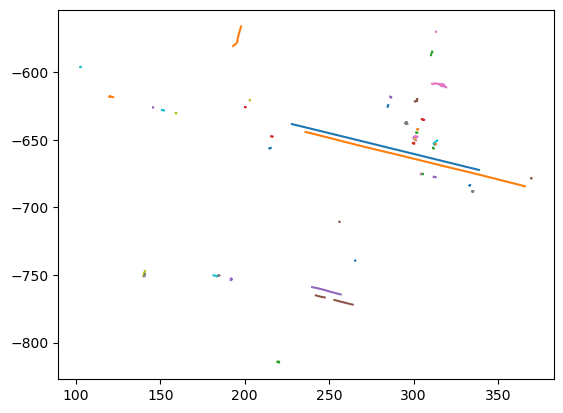

In [16]:
data_matrix = train_data[0]

for i in range(data_matrix.shape[0]):
    xs = data_matrix[i, :, 0]
    ys = data_matrix[i, :, 1]
    # trim all zeros
    xs = xs[xs != 0]
    ys = ys[ys != 0]
    # plot each line going from transparent to full
    plt.plot(xs, ys)

plt.show()

In [ ]:


# make gif out of a scene.
def make_gif(data_matrix, name='example'):
   cmap = plt.cm.get_cmap('viridis', 50)
   fig, ax = plt.subplots(figsize=(10, 10))
   # Function to update plot for each frame
   def update(frame):
       ax.clear()

       # Get data for current timestep
       for i in range(1, data_matrix.shape[0]):
           x = data_matrix[i, frame, 0]
           y = data_matrix[i, frame, 1]
           if x != 0 and y != 0:
               xs = data_matrix[i, :frame+1, 0]  # Include current frame
               ys = data_matrix[i, :frame+1, 1]  # Include current frame
               # trim all zeros
               mask = (xs != 0) & (ys != 0)  # Only keep points where both x and y are non-zero
               xs = xs[mask]
               ys = ys[mask]

               # Only plot if we have points to plot
               if len(xs) > 0 and len(ys) > 0:
                   color = cmap(i)
                   ax.plot(xs, ys, alpha=0.9, color=color)
                   ax.scatter(x, y, s=80, color=color)

       ax.plot(data_matrix[0, :frame, 0], data_matrix[0, :frame, 1], color='tab:orange', label='Ego Vehicle')
       ax.scatter(data_matrix[0, frame, 0], data_matrix[0, frame, 1], s=80, color='tab:orange')
       # Set title with timestep
       ax.set_title(f'Timestep {frame}')
       # Set consistent axis limits
       ax.set_xlim(data_matrix[:,:,0][data_matrix[:,:,0] != 0].min() - 10, data_matrix[:,:,0][data_matrix[:,:,0] != 0].max() + 10)
       ax.set_ylim(data_matrix[:,:,1][data_matrix[:,:,1] != 0].min() - 10, data_matrix[:,:,1][data_matrix[:,:,1] != 0].max() + 10)
       ax.legend()

       return ax.collections + ax.lines

   # Create animation
   anim = animation.FuncAnimation(fig, update, frames=list(range(0, data_matrix.shape[1], 3)),
                               interval=100, blit=True)
   # Save as GIF
   anim.save(f'trajectory_visualization_{name}.gif', writer='pillow')
   plt.close()
data_matrix = train_data[1]        
make_gif(data_matrix, 'index0')


/var/folders/ys/3yhts4qd4js54pqhd2q0hkjr0000gn/T/ipykernel_39917/377493624.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 50)
